Import Datasets :

In [2]:
from google.colab import files
train_data=files.upload()
valid_data=files.upload()
test_data=files.upload()

Saving Dataset_1_train.csv to Dataset_1_train.csv


Saving Dataset_1_valid.csv to Dataset_1_valid.csv


Saving Dataset_1_test.csv to Dataset_1_test.csv


Load datasets :

In [4]:
import pandas as pd
train_df=pd.read_csv('Dataset_1_train.csv')
valid_df=pd.read_csv('Dataset_1_valid.csv')
test_df=pd.read_csv('Dataset_1_test.csv')

Convert DataFrames to NumPy arrays :

In [5]:
import numpy as np
train=train_df.to_numpy()
valid=valid_df.to_numpy()
test=test_df.to_numpy()

**1.Linear Regression :**

 This section visualizes the training, validation, and test datasets along with the predictions from the linear model. For each dataset, actual data points are displayed using scatter plots, while predicted values are shown as lines. By comparing the plots, we can assess how well the model fits the training data and how its performance generalizes to the validation and test sets. Differences in the alignment between points and prediction lines indicate variations in model accuracy across datasets.

 Compute regression coefficients :

In [6]:
x=train[:,0]
y=train[:,1]
n = len(x)
xi = np.sum(x)
yi = np.sum(y)
xi2 = np.sum(x**2)
xiyi = np.sum(x*y)
w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
y_pred = w0 + w1 * x

Function to compute Mean Squared Error :

RMSE = √[ Σ(Y_pred – Y_true)² / n ]

In [7]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Compute RMSE for datasets :

In [9]:
RMSE_train = RMSE(train[:,0], y_pred)
RMSE_valid = RMSE(valid[:,0], y_pred)
RMSE_test  = RMSE(test[:,0],  y_pred)
print(RMSE_train)
print(RMSE_valid)
print(RMSE_test)

5.60955518567402
6.114243103804188
6.264318983228525


Plot regression line and datasets :


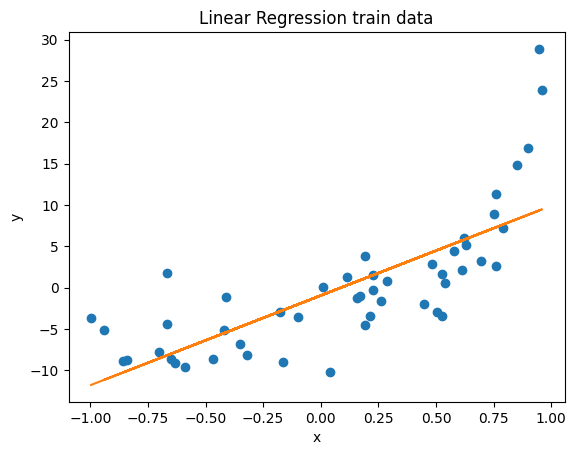

In [10]:
import matplotlib.pyplot as plt
plt.plot(train[:,0], train[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression train data')
plt.show()

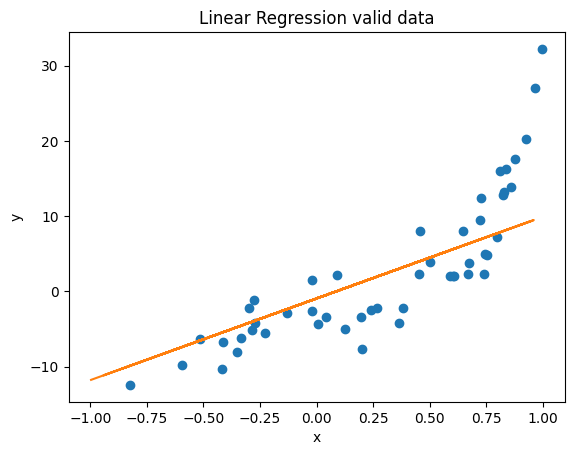

In [ ]:
plt.plot(valid[:,0], valid[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression valid data')
plt.show()

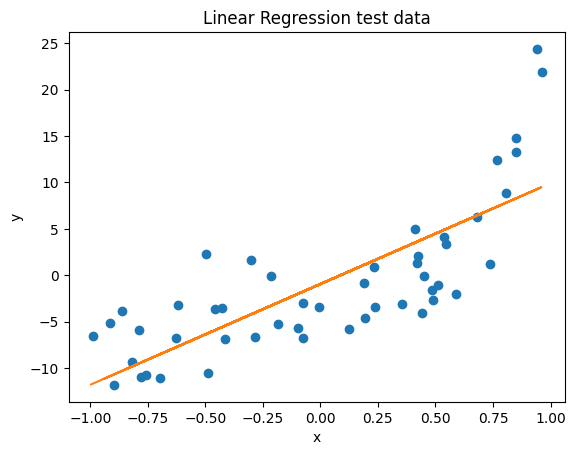

In [ ]:
plt.plot(test[:,0], test[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression test data')
plt.show()

**2.polynomyal regression :**

This section investigates how polynomial regression models of different degrees (1 to 11) perform on the training and validation datasets. For each degree
**D**, polynomial features are created, the model is fitted to the training data, and the RMSE is calculated for both the training and validation sets. The RMSE values for the training and validation data are then plotted as a function of degree D to show how the error changes with increasing degree.


The resulting plot shows that RMSE on the training set decreases consistently as the polynomial degree increases, indicating that higher-degree polynomials fit the training data more closely. The RMSE on the validation set decreases initially, reaching its minimum around degree 4, and then starts to slightly increase for higher degrees. This pattern indicates that polynomial degrees higher than 4 begin to overfit the training data, capturing noise rather than meaningful trends, which reduces generalization performance. **Therefore, degree 4 appears to be the optimal choice, achieving a good balance between accurate training fit and reliable performance on unseen validation data.

Compute RMSE for different polynomial degrees :

In [11]:
import numpy.linalg as la
x = train[:,0]
y = train[:,1]
x_valid = valid[:,0]
y_valid = valid[:,1]
n = len(x)
Rmse_train = []
Rmse_valid = []
for D in range(1, 11):
    x_poly = np.c_[np.ones(n)]
    for i in range(1, D+1):
        x_poly = np.c_[x_poly, x**i]
    w = la.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y)
    y_pred_train = x_poly.dot(w)
    Rmse_train.append(RMSE(y_pred_train, y))
    x_poly_valid = np.c_[np.ones(len(x_valid))]
    for i in range(1, D+1):
        x_poly_valid = np.c_[x_poly_valid, x_valid**i]
    y_pred_valid = x_poly_valid.dot(w)
    Rmse_valid.append(RMSE(y_pred_valid, y_valid))
print("RMSE train:", Rmse_train)
print("RMSE valid:", Rmse_valid)

RMSE train: [np.float64(5.43152976578808), np.float64(4.0874272275743015), np.float64(3.685537862752044), np.float64(3.1587182717734206), np.float64(3.047387864793634), np.float64(3.0132604853810765), np.float64(2.9798908301503078), np.float64(2.969875969077349), np.float64(2.958980311597595), np.float64(2.9589802317980167)]
RMSE valid: [np.float64(5.9292491068151785), np.float64(4.369640299805611), np.float64(3.638406896450773), np.float64(2.9846830059043366), np.float64(3.04343311408945), np.float64(3.0641636225021682), np.float64(3.1165499164863113), np.float64(3.094314194533126), np.float64(3.2106501266763416), np.float64(3.2108768058237334)]


Plot RMSE vs Polynomial Degree for Training and Validation sets :

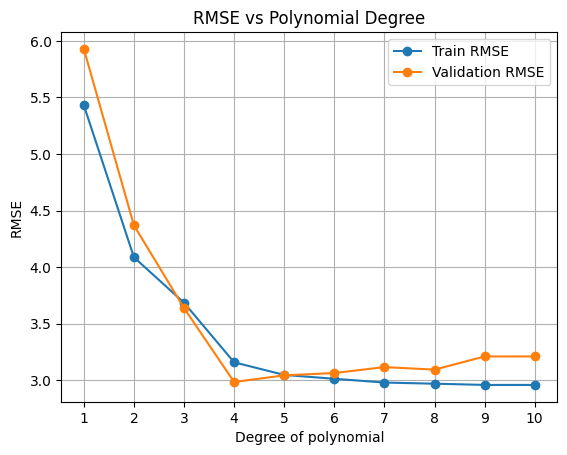

In [12]:
degrees = range(1, 11)
plt.plot(degrees, Rmse_train, marker='o', label='Train RMSE')
plt.plot(degrees, Rmse_valid, marker='o', label='Validation RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

 Compute regression coefficients for best degree :

In [13]:
best_degree = 4
x_poly = np.c_[np.ones(n)]
for i in range(1, best_degree+1):
    x_poly = np.c_[x_poly, x**i]
    print(x_poly)

[[ 1.          0.85008454]
 [ 1.         -0.84062853]
 [ 1.          0.22743278]
 [ 1.         -0.64950787]
 [ 1.          0.62124064]
 [ 1.          0.16952897]
 [ 1.         -0.63048262]
 [ 1.          0.5023563 ]
 [ 1.          0.11255756]
 [ 1.          0.21489179]
 [ 1.          0.75205234]
 [ 1.          0.79228717]
 [ 1.         -0.10011854]
 [ 1.          0.58034048]
 [ 1.          0.69358605]
 [ 1.         -0.17889038]
 [ 1.         -0.70375026]
 [ 1.          0.28753492]
 [ 1.          0.19210233]
 [ 1.         -0.32000178]
 [ 1.         -0.94158596]
 [ 1.          0.96003431]
 [ 1.          0.53915652]
 [ 1.          0.48166127]
 [ 1.         -0.42127254]
 [ 1.         -0.85934723]
 [ 1.         -0.46633182]
 [ 1.          0.22567214]
 [ 1.          0.61342708]
 [ 1.          0.01031131]
 [ 1.          0.44953152]
 [ 1.         -0.6660651 ]
 [ 1.          0.75833655]
 [ 1.         -0.66585625]
 [ 1.          0.15844014]
 [ 1.          0.2622595 ]
 [ 1.          0.94906406]
 

In [14]:
w = la.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y)
y_pred = x_poly.dot(w)

Plot polynomial regression curve and datasets :

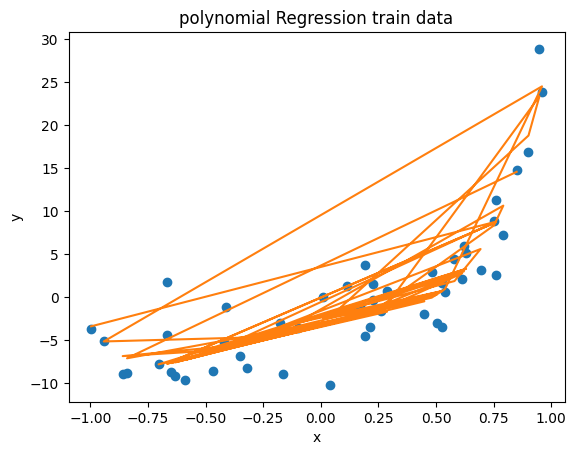

In [15]:
plt.plot(train[:,0], train[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('polynomial Regression train data')
plt.show()

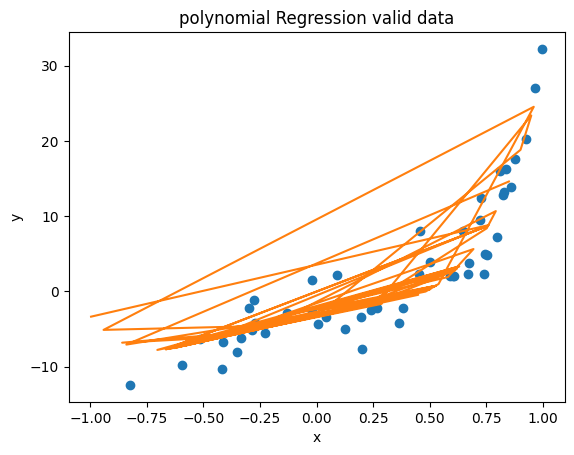

In [16]:
plt.plot(valid[:,0], valid[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('polynomial Regression valid data')
plt.show()

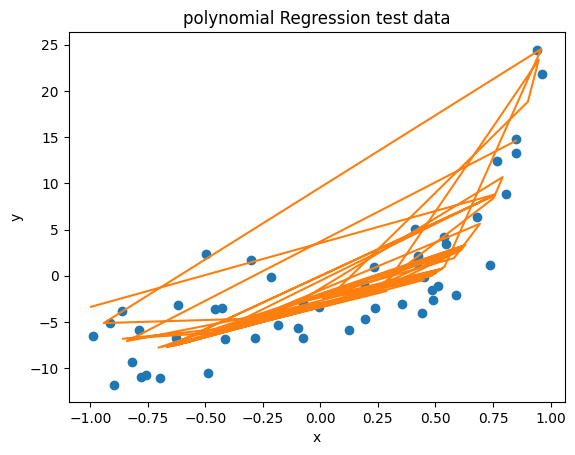

In [17]:
plt.plot(test[:,0], test[:,1], 'o')
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('polynomial Regression test data')
plt.show()